In [252]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
import numpy as np
from scipy.interpolate import interp1d

In [253]:
encoder_1 = pd.read_csv('mediciones_tiempo/encoder/Encoder1.csv')
acelerometro_1 = pd.read_csv('mediciones_tiempo/acelerometro/acelerometro1.csv')

In [254]:
print(acelerometro_1)

               time  ax (m/s^2)  ay (m/s^2)  az (m/s^2)  aT (m/s^2)
0     19:31:36:0640      0.5113      0.2772     -0.0513       0.584
1     19:31:36:0650      0.5113      0.2772     -0.0513       0.584
2     19:31:36:0660     -0.1856     -0.0225     -0.0334       0.190
3     19:31:36:0670     -0.1856     -0.0225     -0.0334       0.190
4     19:31:36:0680     -0.1856     -0.0225     -0.0334       0.190
...             ...         ...         ...         ...         ...
6877  19:32:09:9850     -0.2204      0.0808     -0.5058       0.558
6878  19:32:09:9900     -0.2204      0.0808     -0.5058       0.558
6879  19:32:09:9950     -0.2204      0.0808     -0.5058       0.558
6880  19:32:10:0000     -0.2204      0.0808     -0.5058       0.558
6881  19:32:10:0070      0.3776      0.0390      0.3273       0.501

[6882 rows x 5 columns]


In [255]:
# Convertir las fechas de encoder y acelerómetro a datetime
encoder_date = pd.to_datetime(encoder_1.iloc[:, 0], format='%H:%M:%S:%f')
encoder_accel_ita = encoder_1.iloc[:, 3]

copia = acelerometro_1.iloc[:, 0]
acelerometro_date = pd.to_datetime(copia, format='%H:%M:%S:%f')
acelerometro_accel_ita = acelerometro_1.iloc[:, 4]
print(acelerometro_accel_ita)

0       0.584
1       0.584
2       0.190
3       0.190
4       0.190
        ...  
6877    0.558
6878    0.558
6879    0.558
6880    0.558
6881    0.501
Name: aT (m/s^2), Length: 6882, dtype: float64


In [256]:
print(len(acelerometro_date))
print(len(acelerometro_date))
print(len(acelerometro_1))
print(encoder_date)

print(encoder_date.iloc[-1])

6882
6882
6882
0     1900-01-01 19:31:59.894
1     1900-01-01 19:31:59.896
2     1900-01-01 19:31:59.899
3     1900-01-01 19:31:59.901
4     1900-01-01 19:31:59.904
                ...          
138   1900-01-01 19:32:00.264
139   1900-01-01 19:32:00.267
140   1900-01-01 19:32:00.269
141   1900-01-01 19:32:00.272
142   1900-01-01 19:32:00.275
Name: 19:31:59:891, Length: 143, dtype: datetime64[ns]
1900-01-01 19:32:00.275000


In [257]:


# Búsqueda del inicio del acelerómetro en relación con el encoder
for start_idx, date1 in enumerate(acelerometro_date):
    encoder_date_start = pd.to_datetime(encoder_date.iloc[0])
    
    if date1 >= encoder_date_start:
        print("El comienzo del encoder es:", encoder_date_start)
        print("El comienzo del acelerómetro es:", date1)
        break

# Verifica el valor de start_idx
print("Valor de start_idx:", start_idx)

# Cortamos los datos del acelerómetro desde el inicio identificado
if start_idx < len(acelerometro_1):  # Verifica que el índice sea válido
    acelerometro_1 = acelerometro_1.iloc[start_idx:]
    acelerometro_date = acelerometro_date.iloc[start_idx:]
else:
    print("No se encontró un índice de inicio válido.")

# Búsqueda del final del acelerómetro en relación con el encoder
for end_idx, date1 in enumerate(acelerometro_date):
    encoder_date_end = pd.to_datetime(encoder_date.iloc[-1])
    
    if date1 >= encoder_date_end:
        print("El final del encoder es:", encoder_date_end)
        print("El final del acelerómetro es:", date1)
        break

# Verifica el valor de end_idx
print("Valor de end_idx:", end_idx)
# Cortamos los datos del acelerómetro entre los índices encontrados
if end_idx < len(acelerometro_1):  # Verifica que el índice sea válido
    acelerometro_1 = acelerometro_1.iloc[:end_idx]
else:
    print("No se encontró un índice de final válido.")


El comienzo del encoder es: 1900-01-01 19:31:59.894000
El comienzo del acelerómetro es: 1900-01-01 19:31:59.898000
Valor de start_idx: 4834
El final del encoder es: 1900-01-01 19:32:00.275000
El final del acelerómetro es: 1900-01-01 19:32:00.278000
Valor de end_idx: 77


In [263]:
print(acelerometro_1.head)

<bound method NDFrame.head of                time  ax (m/s^2)  ay (m/s^2)  az (m/s^2)  aT (m/s^2)
4834  19:31:59:8980      0.3413      1.8873      4.2798       4.690
4835  19:31:59:9050      0.0381      1.6688      5.6299       5.872
4836  19:31:59:9080      0.0381      1.6688      5.6299       5.872
4837  19:31:59:9130      0.0381      1.6688      5.6299       5.872
4838  19:31:59:9170      0.0381      1.6688      5.6299       5.872
...             ...         ...         ...         ...         ...
4906  19:32:00:2530     -0.0864     -0.8213      1.5141       1.725
4907  19:32:00:2580     -0.0864     -0.8213      1.5141       1.725
4908  19:32:00:2630      0.0894      0.2588     -1.0894       1.123
4909  19:32:00:2700      0.0894      0.2588     -1.0894       1.123
4910  19:32:00:2730      0.0894      0.2588     -1.0894       1.123

[77 rows x 5 columns]>


In [264]:

copia = acelerometro_1.iloc[:, 0]
acelerometro_date = pd.to_datetime(copia, format='%H:%M:%S:%f')
acelerometro_accel_ita = acelerometro_1.iloc[:, 4]

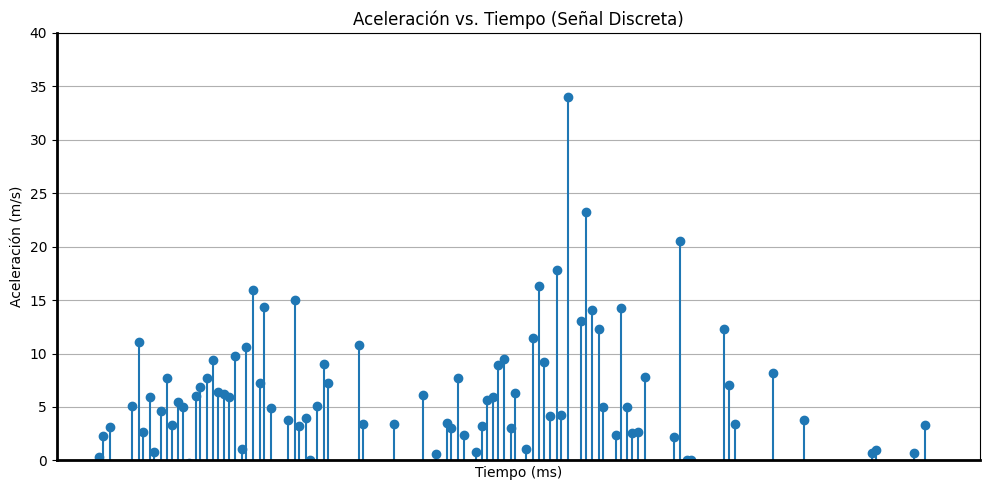

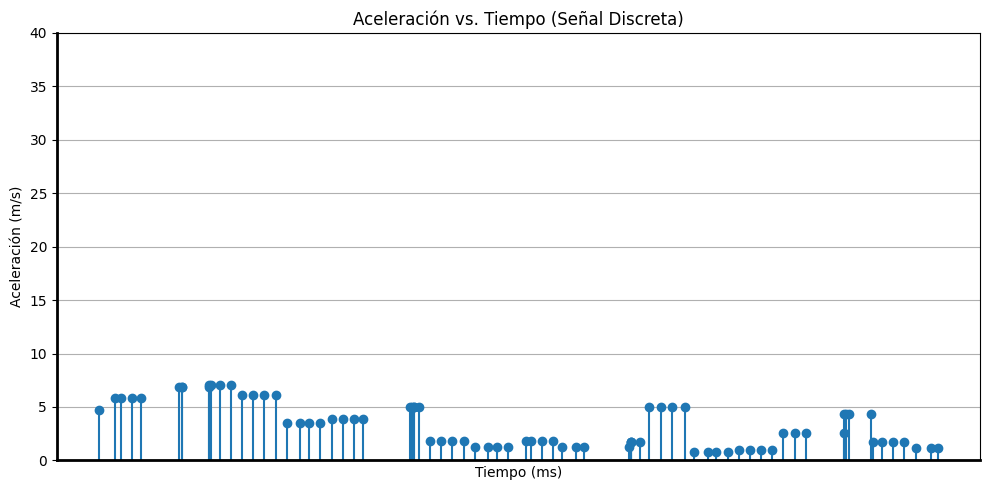

In [265]:
plt.figure(figsize=(10, 5))
plt.stem(encoder_date, encoder_accel_ita, basefmt=" ")
plt.title('Aceleración vs. Tiempo (Señal Discreta)')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Aceleración (m/s)')
plt.grid()

# Resaltar los ejes
ax = plt.gca()  # Obtener el eje actual
ax.spines['bottom'].set_linewidth(2)  # Grosor del eje x
ax.spines['left'].set_linewidth(2)    # Grosor del eje y
plt.xticks([]) 
# Cambiar color de los ejes
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')

plt.ylim(0, 40) 
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 5))
plt.stem(acelerometro_date, acelerometro_accel_ita, basefmt=" ")
plt.title('Aceleración vs. Tiempo (Señal Discreta)')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Aceleración (m/s)')
plt.grid()

# Resaltar los ejes
ax = plt.gca()  # Obtener el eje actual
ax.spines['bottom'].set_linewidth(2)  # Grosor del eje x
ax.spines['left'].set_linewidth(2)    # Grosor del eje y
plt.xticks([]) 
# Cambiar color de los ejes
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')

plt.ylim(0, 40) 
plt.tight_layout()
plt.show()
